In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
print(files)

[Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_11.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_43.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_157.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_147.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_85.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_152.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_120.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_95.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_188.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_115.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_118.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_223.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_37.jpg'), Path('/root/.fastai/data/oxford-i

In [10]:
def label_function(file_name):
  if file_name[0].isupper():
    return True
  else:
    return False

In [12]:
dls = ImageDataLoaders.from_name_func(path, files, label_function, item_tfms=Resize(224))

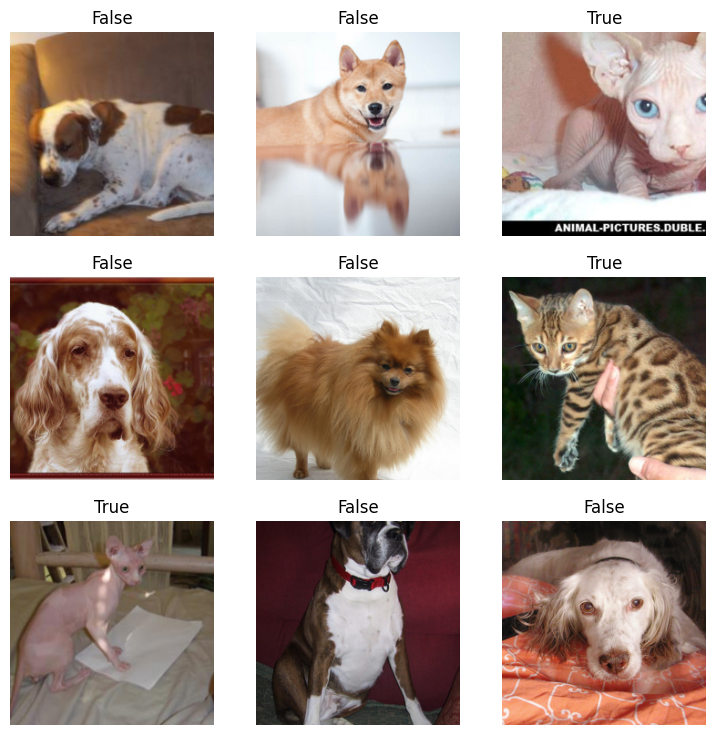

In [13]:
dls.show_batch()

In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 139MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.160463,0.018954,0.006089,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.052803,0.006926,0.002030,00:49


In [15]:
learn.predict(files[0])

('True', tensor(1), tensor([1.4933e-09, 1.0000e+00]))

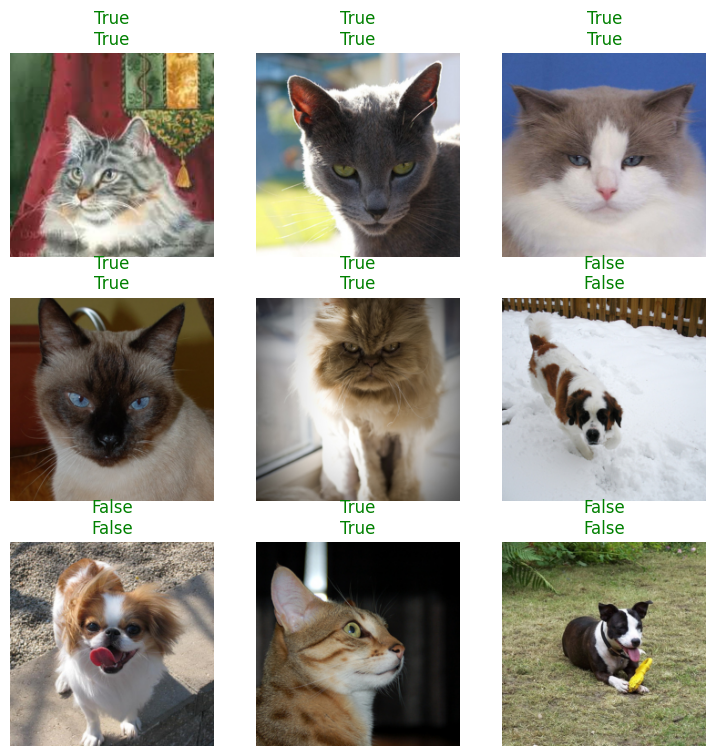

In [16]:
learn.show_results()